In [ ]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['sex'].astype('str')
df['smoker'].astype('str')
df['region'].astype('str')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

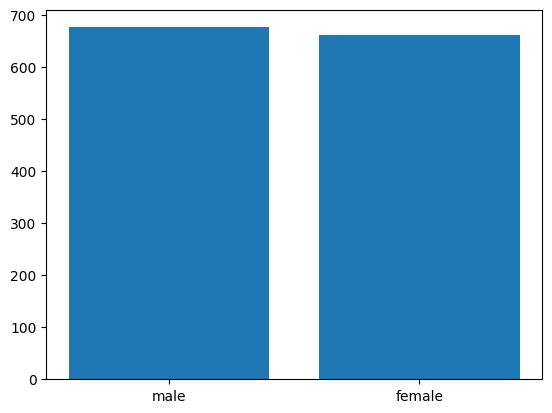

In [ ]:
import matplotlib.pyplot as plt

gender_counts = df['sex'].value_counts()

plt.bar(x=gender_counts.index, height=gender_counts.values)
plt.show()

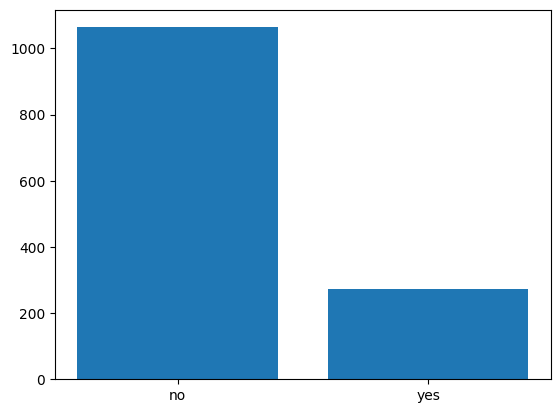

In [ ]:
import matplotlib.pyplot as plt

smoker_counts = df['smoker'].value_counts()

plt.bar(x=smoker_counts.index, height=smoker_counts.values)
plt.show()

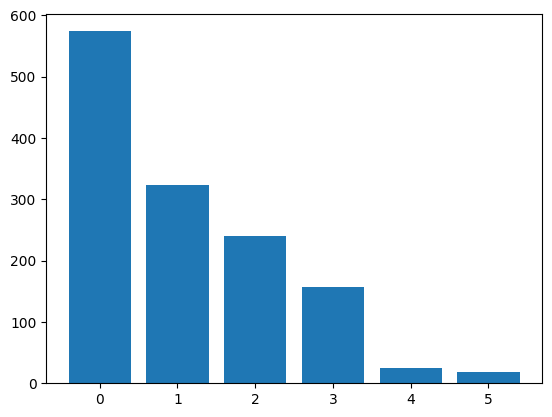

In [ ]:
import matplotlib.pyplot as plt

childs_counts = df['children'].value_counts()

plt.bar(x=childs_counts.index, height=childs_counts.values)
plt.show()

## **preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
# sex smoke region
df['sex'] = enc.fit_transform(df['sex'])
df['smoker'] = enc.fit_transform(df['smoker'])
df['region'] = enc.fit_transform(df['region'])


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## **Train**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['charges'])
y = df['charges']
x_train, x_test ,y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
score1 = mean_absolute_error(y_test,y_pred)
score2 = mean_squared_error(y_test,y_pred)
score3 = r2_score(y_test,y_pred)


In [ ]:
print('mean_absolute_error',score1)
print('mean_squared_error',score2)
print('r2',score3)

mean_absolute_error 4310.965775769851
mean_squared_error 36709221.05317072
r2 0.7451201723273824
